## Variables à ajouter issues des recherches biblio

Variable(s): 
-Population des pays représentés 
-Variable indiquant si le pays est communiste ou pas 
-Variable indiquant si le pays est stable ou pas 
-Variable indiquant si le pays est émergeant ou pas ( otherwise pauvre , riche à peaufiner par la suite) 
-Variable indiquant si le pays a la culture du sport ou pas. 
-Variable indiquant le PIB par habitant 
-Variable indiquant les financements alloués aux sports (olympiques ou pas)


### Introduction et Analyse du problème 

Il faut créer le train et le test avec des données 2024 , il faut les construire , il faut aussi savoir traiter le fait que cette fois ci la Russie ne sera pas disponible .
Faire indice : pays perturbé 1 avec Russie par exemple ou bien on enlève la Russie  (contexte géopolitique simple, on tah les années où j'ai eu un pb )

But c'est de prédire le nombre de médailles pour chaque pays , indicateur simple 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
%load_ext ipython_memory_usage 

Enabling IPython Memory Usage, use %imu_start to begin, %imu_stop to end


In [3]:
%imu_start

'IPython Memory Usage started'

In [3] used 0.1 MiB RAM in 0.17s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 114.6 MiB


In [4]:
df_athlete=pd.read_csv('data/athlete_events.csv',sep=',')

#df_athlete

In [4] used 68.4 MiB RAM in 0.96s (system mean cpu 40%, single max cpu 100%), peaked 52.7 MiB above final usage, current RAM usage now 183.1 MiB


In [5]:
df_athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5] used 1.0 MiB RAM in 0.36s (system mean cpu 54%, single max cpu 100%), peaked 4.0 MiB above final usage, current RAM usage now 184.0 MiB


La base de données comporte 271116 lignes et 15 colonnes , chaque ligne correspond à un athlète ayant participé dans une discipline aux jeux olympiques 

### Chargement et analyse de la mémoire 

In [6]:
df_athlete.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 177.8 MB
In [6] used -6.8 MiB RAM in 0.72s (system mean cpu 25%, single max cpu 94%), peaked 10.2 MiB above final usage, current RAM usage now 177.2 MiB


La base de données actuellement utilise 177.8 MB , le bloc -33.3 MiB par apport au précédent ( logique c'est juste une ligne de code tandis que l'autre on exécute une DF) 

Certaines informations manquantes sur le poids, la taille , l'âge de certains joueurs 

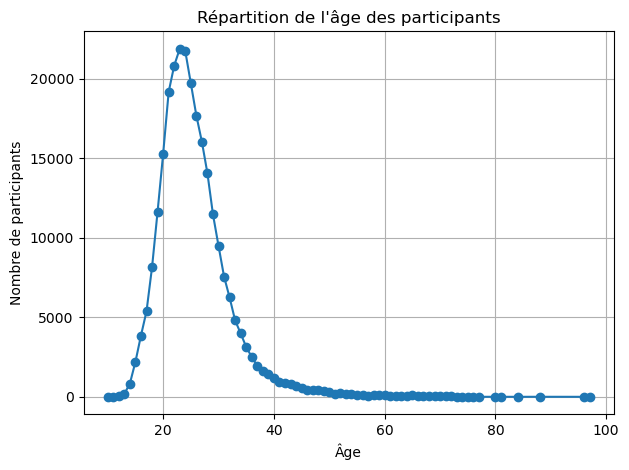

In [7] used 16.3 MiB RAM in 1.38s (system mean cpu 26%, single max cpu 100%), peaked 0.1 MiB above final usage, current RAM usage now 193.4 MiB


In [7]:
import matplotlib.pyplot as plt

# Premier graphique Age
age_size = df_athlete.groupby(df_athlete["Age"]).size()
plt.plot(age_size.index, age_size.values, marker='o', linestyle='-')
plt.title("Répartition de l'âge des participants")
plt.xlabel('Âge')
plt.ylabel('Nombre de participants')
plt.grid(True)

plt.tight_layout()
plt.show()



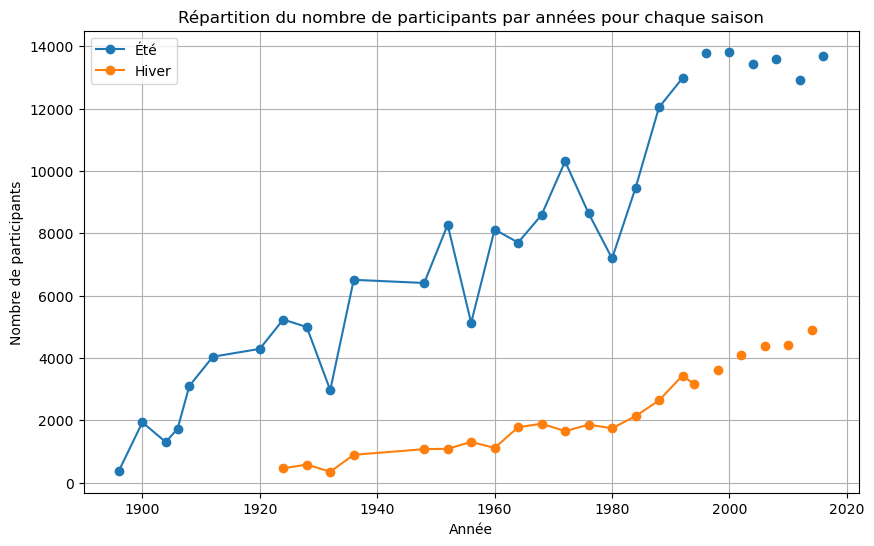

In [8] used -18.7 MiB RAM in 0.76s (system mean cpu 54%, single max cpu 100%), peaked 0.2 MiB above final usage, current RAM usage now 174.7 MiB


In [8]:
# Groupement par année et saison pour tous les données
year_season_size = df_athlete.groupby(['Year', 'Season']).size().unstack()

# Création du graphique
plt.figure(figsize=(10, 6))

# Tracé des courbes pour chaque saison
plt.plot(year_season_size.index, year_season_size['Summer'], marker='o', linestyle='-', label='Été')
plt.plot(year_season_size.index, year_season_size['Winter'], marker='o', linestyle='-', label='Hiver')

# Ajout de titre et de légendes
plt.title("Répartition du nombre de participants par années pour chaque saison")
plt.xlabel('Année')
plt.ylabel('Nombre de participants')
plt.grid(True)
plt.legend()

# Affichage du graphique
plt.show()


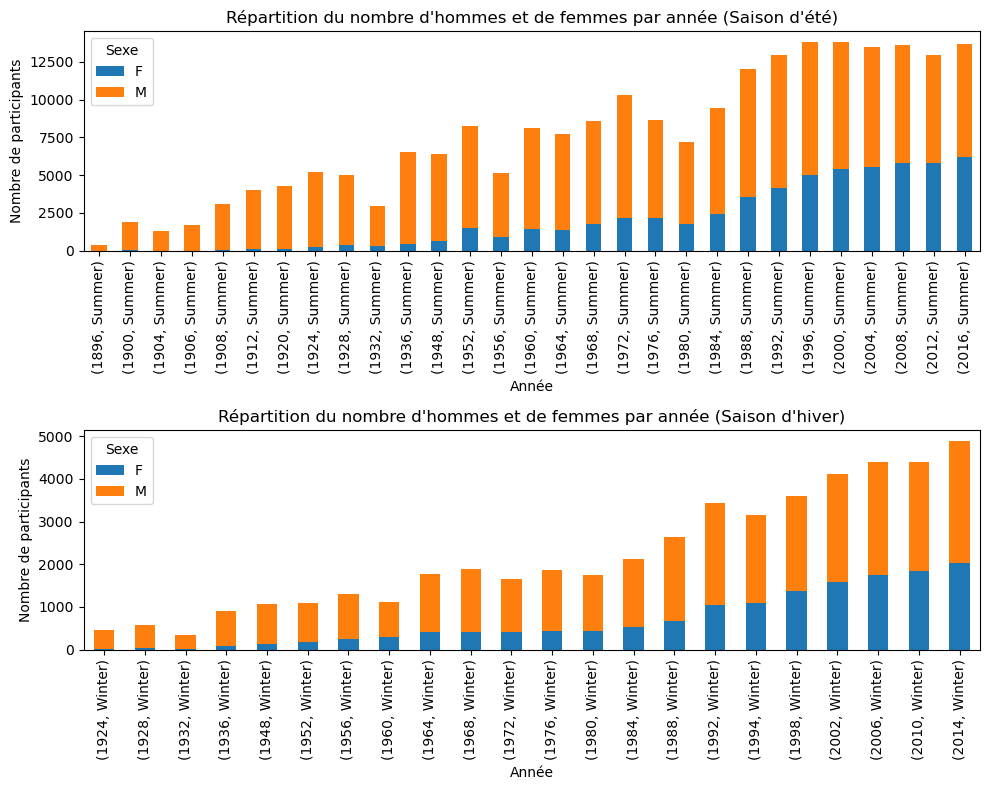

In [9] used 16.2 MiB RAM in 1.33s (system mean cpu 45%, single max cpu 100%), peaked 0.2 MiB above final usage, current RAM usage now 191.0 MiB


In [9]:
# Regroupement des données par année, saison et sexe
year_season_sex_count = df_athlete.groupby(['Year', 'Season', 'Sex']).size().unstack()

# Création du graphique
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Tracé du nombre d'hommes et de femmes pour la saison d'été
year_season_sex_count.loc[(slice(None), 'Summer'), :].plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title("Répartition du nombre d'hommes et de femmes par année (Saison d'été)")
axs[0].set_xlabel('Année')
axs[0].set_ylabel('Nombre de participants')
axs[0].legend(title='Sexe')

# Tracé du nombre d'hommes et de femmes pour la saison d'hiver
year_season_sex_count.loc[(slice(None), 'Winter'), :].plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title("Répartition du nombre d'hommes et de femmes par année (Saison d'hiver)")
axs[1].set_xlabel('Année')
axs[1].set_ylabel('Nombre de participants')
axs[1].legend(title='Sexe')

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()


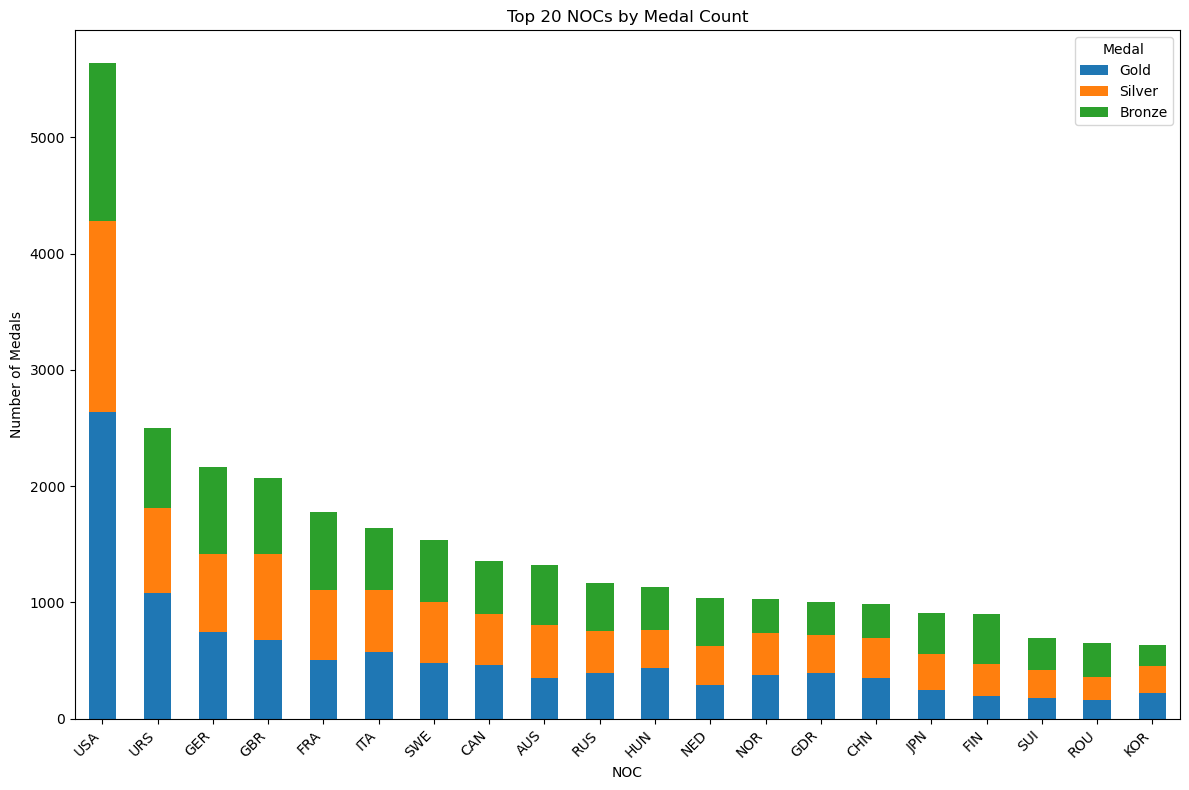

In [10] used 8.4 MiB RAM in 1.12s (system mean cpu 68%, single max cpu 100%), peaked 0.1 MiB above final usage, current RAM usage now 199.4 MiB


In [10]:
import matplotlib.pyplot as plt

# Grouping the data by NOC and Medal
noc_medal_count = df_athlete.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

# Calculating the total number of medals for each NOC
noc_medal_count['Total'] = noc_medal_count.sum(axis=1)

# Sorting the NOCs based on the total number of medals
noc_medal_count = noc_medal_count.sort_values(by='Total', ascending=False).head(20)  # Top 20 NOCs

# Creating the composite graph
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the count of gold, silver, and bronze medals for each NOC
noc_medal_count[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, ax=ax)

# Setting the title and labels
plt.title('Top 20 NOCs by Medal Count')
plt.xlabel('NOC')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Medal')

# Showing the plot
plt.tight_layout()
plt.show()


In [41]:

df_medal_test = df_athlete.copy()

df_medal_test['medal_transform'] = df_medal_test['Medal']

#transform the medal into numeric values
df_medal_test['medal_transform'] = df_medal_test.Medal.fillna('0')
df_medal_test['medal_transform'].replace('Gold', 5, inplace=True)
df_medal_test['medal_transform'].replace('Silver', 3, inplace=True)
df_medal_test['medal_transform'].replace('Bronze', 1, inplace=True)


df_medal_test

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,medal_transform
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,0


In [41] used 78.6 MiB RAM in 0.95s (system mean cpu 66%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 263.1 MiB


In [42]:
df_medal_test['medal_transform'] = df_medal_test['medal_transform'].astype('int8')


In [42] used 0.1 MiB RAM in 0.17s (system mean cpu 53%, single max cpu 90%), peaked 0.0 MiB above final usage, current RAM usage now 263.2 MiB


In [43]:
# Grouper par NOC et calculer la somme des médailles
df_grouped_noc_medal = df_medal_test.groupby('NOC')['medal_transform'].sum()

#sort ascending
df_grouped_noc_medal = df_grouped_noc_medal.sort_values(ascending=False)

#convert into df 
df_grouped_noc_medal = df_grouped_noc_medal.reset_index()


total_medals = df_grouped_noc_medal['medal_transform'].sum()

#convert into df 
df_grouped_noc_medal['medal_proportion'] = df_grouped_noc_medal['medal_transform'].apply(lambda x: x / total_medals)


print(df_grouped_noc_medal.head(20))



    NOC  medal_transform  medal_proportion
0   USA            19471          0.162933
1   URS             8295          0.069412
2   GER             6493          0.054333
3   GBR             6258          0.052367
4   FRA             5001          0.041848
5   ITA             4999          0.041832
6   SWE             4496          0.037622
7   CAN             4080          0.034141
8   AUS             3622          0.030309
9   HUN             3527          0.029514
10  RUS             3459          0.028945
11  NOR             3267          0.027338
12  GDR             3247          0.027171
13  CHN             3083          0.025799
14  NED             2868          0.023999
15  JPN             2519          0.021079
16  FIN             2232          0.018677
17  KOR             1986          0.016619
18  SUI             1887          0.015790
19  DEN             1795          0.015021
In [43] used 0.4 MiB RAM in 0.15s (system mean cpu 56%, single max cpu 94%), peaked 0.0 MiB above

{'whiskers': [<matplotlib.lines.Line2D at 0x1286aff50>,
 'caps': [<matplotlib.lines.Line2D at 0x129dfbfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x127af86d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12aa6bc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x129dfae50>],
 'means': []}

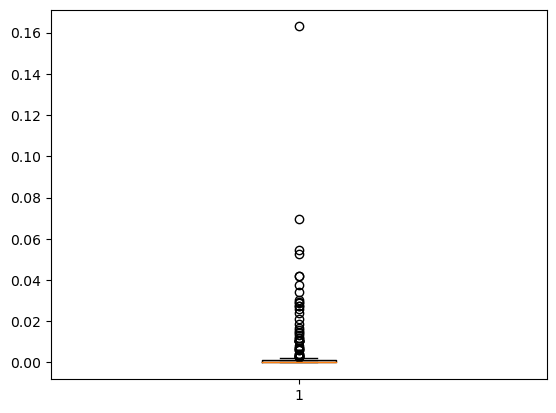

In [45] used -1.0 MiB RAM in 0.56s (system mean cpu 53%, single max cpu 100%), peaked 2.0 MiB above final usage, current RAM usage now 324.4 MiB


In [45]:

plt.boxplot(df_grouped_noc_medal['medal_proportion'])
